<a href="https://colab.research.google.com/github/nadunchanna98/machine-learning/blob/main/Lab2_2019E094.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EC9630: Machine Learning 2019E094

# 1)

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

## Load the data set

In [4]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00265/CASP.csv'
dataset = pd.read_csv(url)

In [5]:
dataset.head(10)

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,17.284,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,4287.87,102,27.0302
1,6.021,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,3328.91,39,38.5468
2,9.275,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,2981.04,29,38.8119
3,15.851,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,3248.22,70,39.0651
4,7.962,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,2814.42,41,39.9147
5,1.700,5117.30,1120.99,0.21905,51.6732,6.727227e+05,79.5911,3234.21,15,41.2382
6,9.314,5924.16,1625.27,0.27434,70.2103,8.285145e+05,76.8064,2821.40,70,39.4964
7,1.985,6882.15,1791.22,0.26027,77.2501,9.165165e+05,96.6785,3490.88,74,37.4203
8,1.915,12090.00,4190.74,0.34662,129.0020,1.687508e+06,186.3090,4262.78,39,30.3916
9,1.495,7400.24,1881.95,0.25430,82.9320,1.023846e+06,104.6970,3852.40,26,35.4140


# 2)

##  Study the dataset.

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45730 entries, 0 to 45729
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RMSD    45730 non-null  float64
 1   F1      45730 non-null  float64
 2   F2      45730 non-null  float64
 3   F3      45730 non-null  float64
 4   F4      45730 non-null  float64
 5   F5      45730 non-null  float64
 6   F6      45730 non-null  float64
 7   F7      45730 non-null  float64
 8   F8      45730 non-null  int64  
 9   F9      45730 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 3.5 MB


In [7]:
print(dataset.shape)

(45730, 10)


In [8]:
dataset.describe()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
count,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,4.573000e+04,45730.000000,45730.000000,45730.000000,45730.000000
mean,7.748528,9871.596995,3017.367175,0.302392,103.492433,1.368299e+06,145.638061,3989.755990,69.975071,34.523664
std,6.118312,4058.138034,1464.324663,0.062886,55.424985,5.640367e+05,69.999230,1993.574575,56.493443,5.979755
min,0.000000,2392.050000,403.500000,0.092500,10.310100,3.194902e+05,31.970400,0.000000,0.000000,15.228000
25%,2.305000,6936.680000,1979.045000,0.258740,63.563900,9.535912e+05,94.757500,3165.322500,31.000000,30.424725
50%,5.030000,8898.805000,2668.155000,0.300150,87.740800,1.237219e+06,126.176000,3840.170000,54.000000,35.299300
75%,13.379000,12126.150000,3786.410000,0.342890,133.646750,1.690920e+06,181.468500,4644.192500,91.000000,38.870800
max,20.999000,40034.900000,15312.000000,0.577690,369.317000,5.472011e+06,598.408000,105948.170000,350.000000,55.300900


<Axes: >

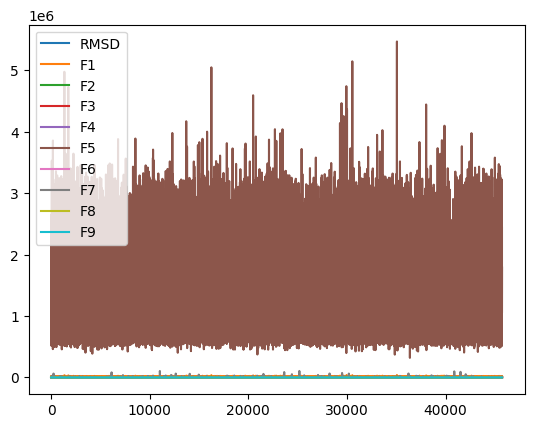

In [9]:
dataset.plot()

# 3)

## Separate the features (X) and target variable (y)

In [10]:
X = dataset.drop(["RMSD"], axis = 1)
y = dataset['RMSD']

## Split the dataset into train and test sets

In [11]:
# puts 75 percent of the data into a training set and the remaining 25 percent into a testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 4)

### Build a linear regression model on the train data:

In [12]:
# Initialize the linear regression model
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X_train, y_train)

LinearRegression()

# 5)

### Evaluate model on the test data:

In [13]:
# Make predictions on the test data
y_pred = linear_model.predict(X_test)
print(y_pred)


[10.7730823   6.23503845  9.71076705 ...  8.91687596  2.29530443
  6.97772619]


In [14]:
from sklearn.metrics import mean_squared_error

# Calculate the mean squared error (MSE) to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Linear Regression MSE:", mse)

Linear Regression MSE: 27.138534410243057


# 6)

###  Plot test target data against the predicted data

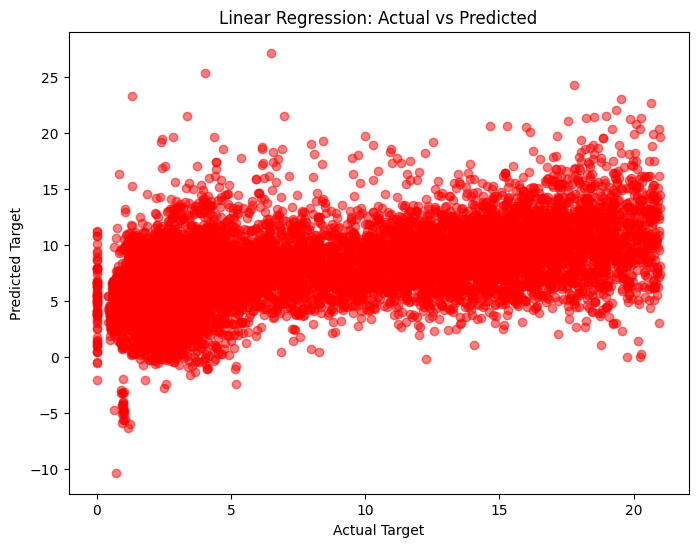

In [30]:
# Plotting the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred,color='red', alpha=0.5)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

# 7)

### Use the random forest regressor to build a regression model

In [16]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the random forest regressor model
rf_model = RandomForestRegressor()

# Fit the model to the training data
rf_model.fit(X_train, y_train)

RandomForestRegressor()

# 8)

### Evaluate the model on test data and plot the predicted value as above.


In [17]:
# Make predictions on the test data
rf_pred = rf_model.predict(X_test)

rf_pred 

array([13.31248,  2.93719,  4.01962, ...,  4.51681,  3.38095, 10.85134])

In [18]:
# Calculate the mean squared error (MSE) to evaluate the model
rf_mse = mean_squared_error(y_test, rf_pred)
print("Random Forest Regression MSE:", rf_mse)

Random Forest Regression MSE: 12.40528013770473


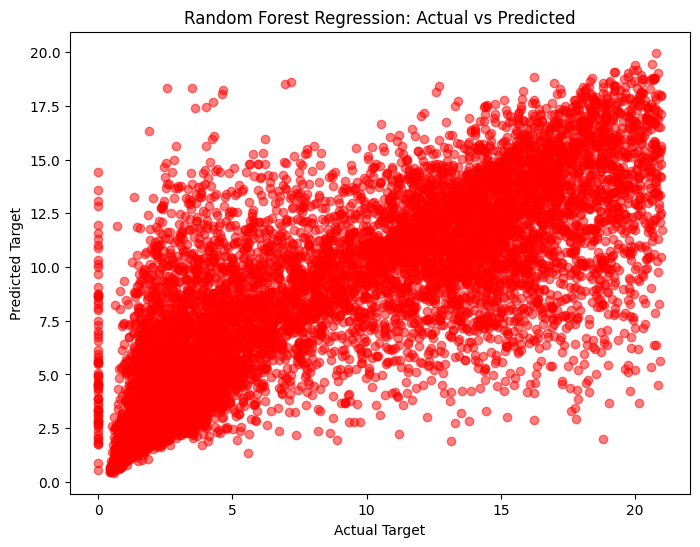

In [29]:
# Plotting the actual vs predicted values for random forest model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_pred,color='red', alpha=0.5)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Random Forest Regression: Actual vs Predicted')
plt.show()

# 9)

## Compare the results by different regression methods.

### using Support Vector Regression (SVR) for comparison

In [20]:
from sklearn.svm import SVR

# Initialize the SVR model
svr_model = SVR()

# Fit the SVR model to the training data
svr_model.fit(X_train, y_train)

# Make predictions on the test data
svr_pred = svr_model.predict(X_test)

# Calculate the mean squared error (MSE) for SVR
mse_svr = mean_squared_error(y_test, svr_pred)
print("SVR MSE:", mse_svr )

SVR MSE: 43.3065382128597


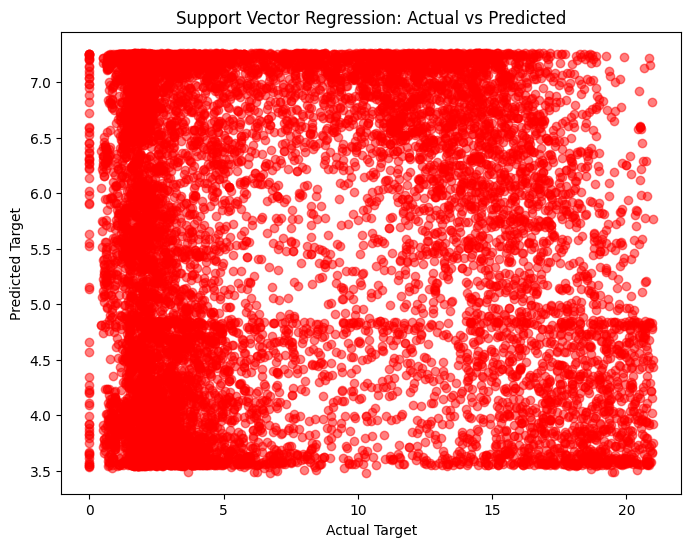

In [27]:
# Plotting the actual vs predicted values for SVR
plt.figure(figsize=(8, 6))
plt.scatter(y_test, svr_pred,color='red', alpha=0.5)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Support Vector Regression: Actual vs Predicted')
plt.show()

### Using Lasso regression

In [33]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=1.0) 
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Lasso Regression MSE:", mse)

Lasso Regression MSE: 27.42816765511913


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.157e+05, tolerance: 1.286e+02
  model = cd_fast.enet_coordinate_descent(


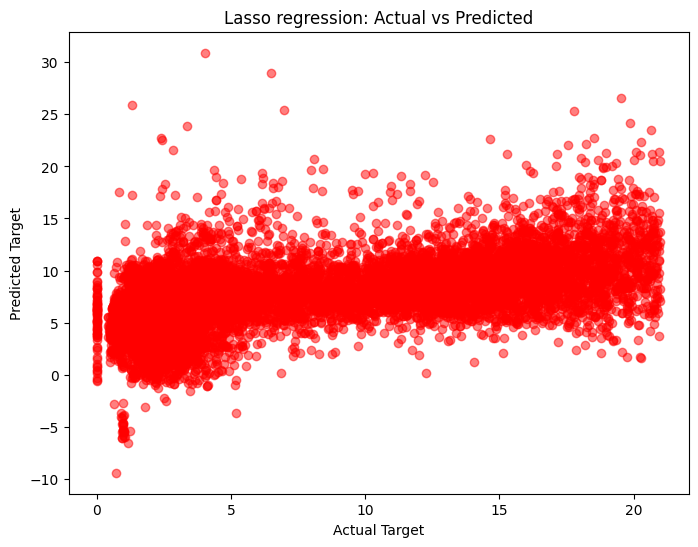

In [32]:
# Plotting the actual vs predicted values for SVR
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred,color='red', alpha=0.5)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Lasso regression: Actual vs Predicted')
plt.show()